<a href="https://colab.research.google.com/github/BalavSha/Deep-Learning/blob/main/Generative_Adversarial_Networks(GANs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**Generative Adversarial Network(GAN)**</center>

## **Text Generation**

Build a sequential model for a **LSTM (Long Short-Term Memory)** neural network:

In [ ]:
# Create a sequential model
regressor = Sequential()

# Add the first LSTM layer with 50 units and 'relu' activation function
# Set 'return_sequences' to True as we will add more LSTM layers
# The input shape is the shape of the training data
regressor.add(LSTM(units=50, activation='relu', return_sequences=True, \
                   input_shape=(X_train.shape[1], 5)))

# Add a dropout layer to prevent overfitting
regressor.add(Dropout(0.2))

# Add the second LSTM layer with 60 units and 'relu' activation function
# Set 'return_sequences' to True as we will add more LSTM layers
regressor.add(LSTM(units=60, activation='relu', return_sequences=True))

# Add another dropout layer
regressor.add(Dropout(0.3))

# Add the third LSTM layer with 80 units and 'relu' activation function
# Set 'return_sequences' to True as we will add more LSTM layers
regressor.add(LSTM(units=80, activation='relu', return_sequences=True))

# Add another dropout layer
regressor.add(Dropout(0.4))

# Add the fourth LSTM layer with 120 units and 'relu' activation function
regressor.add(LSTM(units=120, activation='relu'))

# Add another dropout layer
regressor.add(Dropout(0.5))

# Add a dense layer with 1 unit as the output layer
regressor.add(Dense(units=1))


## **Extending NLP Sequence Models to Generate Text:**

**Steps Involved are:**

*   **Dataset cleaning** encompasses the conversion of the case to lowercase, removing punctuation.

*   **Tokenization** is breaking up a character sequence into specified units called tokens.

*   **Padding** is a way to make input sentences of different sizes the same by padding them.

*   **Padding the sequences** refers to making sure that the sequences have a uniform length.

*   **Stemming** is truncating words down to their stem. For example, the words *rainy* and *raining* both have the stem *rain*.

### ***--> Dataset Cleaning:***

*Create a function to clean text and returns list of words after cleaning. Converting all words in lowercase and encoding for character standardization.*

In [ ]:
# Define a function to clean text
def clean_text(txt):

    # Remove punctuation from the text and convert it to lowercase
    txt = "".join(v for v in txt if v not in string.punctuation).lower()

    # Encode the text as utf-8 and decode it as ascii, ignoring any errors
    txt = txt.encode("utf8").decode("ascii", 'ignore')
    
    # Return the cleaned text
    return txt

# Apply the clean_text function to all headlines in the 'all_headlines' list
corpus = [clean_text(x) for x in all_headlines]

# Print the first 10 elements of the 'corpus' list
corpus[:10]

### ***--> Generating a Sequence and Tokenization:***

In [ ]:
# import tokenizer class from keras
from tensorflow.keras.preprocessing.text import Tokenizer

# Create a Tokenizer object
tokenizer = Tokenizer()

# Define a function to get sequences of tokens from a corpus
def get_seq_of_tokens(corpus):

    # Fit the tokenizer on the corpus
    tokenizer.fit_on_texts(corpus)

    # Get the total number of words in the tokenizer's word index
    all_words = len(tokenizer.word_index) + 1

    # Initialize an empty list to store the input sequences
    input_seq = []

    # Iterate over each line in the corpus
    for line in corpus:

        # Convert the line to a sequence of tokens
        token_list = tokenizer.texts_to_sequences([line])[0]

        # Iterate over each token in the token list
        for i in range(1, len(token_list)):

            # Get the n-gram sequence of tokens
            n_gram_sequence = token_list[:i+1]
            
            # Append the n-gram sequence to the input sequences list
            input_seq.append(n_gram_sequence)

    # Return the input sequences and the total number of words
    return input_seq, all_words

# Get the sequences of tokens and the total number of words from the 'corpus' list
your_sequences, all_words = get_seq_of_tokens(corpus)

# Print the first 10 elements of the 'your_sequences' list
your_sequences[:10]

### ***--> Padding Sequences***

*Create a function to pad each Sequence to make their lengths equal to match length of longest sequence in the text Corpus*

In [ ]:
# Define a function to generate padded sequences
def generate_padded_sequences(input_seq):

    # Get the maximum sequence length
    max_sequence_len = max([len(x) for x in input_seq])

    # Pad the input sequences with zeros, in the beginning of sentences
    input_seq = np.array(pad_sequences(input_seq, maxlen=max_sequence_len, padding='pre'))

    # Split the input sequences into predictors and label
    predictors, label = input_seq[:, :-1], input_seq[:, -1]

    # Convert the label to categorical format
    label = keras.utils.to_categorical(label, num_classes=all_words)

    # Return the predictors, label, and maximum sequence length
    return predictors, label, max_sequence_len

# Generate padded sequences from the 'your_sequences' list
predictors, label, max_sequence_len = generate_padded_sequences(your_sequences)

------

------

#### **Building LSTM Model to generate new news headlines using the historical news information from the dataset**

*Important required libraries*

In [ ]:
# Import the pad_sequences function from the Keras library
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Import the Sequential class from the Keras library
from tensorflow.keras.models import Sequential

# Import the Embedding, LSTM, Dense, and Dropout layers from the Keras library
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Import the keras.utils module as ku
import tensorflow.keras.utils as ku

# Import the Tokenizer class from the Keras library
from tensorflow.keras.preprocessing.text import Tokenizer

# Import the pandas library as pd
import pandas as pd
# Import the numpy library as np
import numpy as np

# Import the EarlyStopping callback from the Keras library
from tensorflow.keras.callbacks import EarlyStopping

# Import the string and os modules
import string, os

# Import the warnings module
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

*Load the Article dataset and display its length:*
--> **Load the Articles.csv dataset in the colab folder first**

In [ ]:
# Set the directory path
your_dir = '/content/'

# Initialize an empty list to store the headlines
all_headlines = []

# Iterate over each file in the directory
for filename in os.listdir(your_dir):

    # Check if the filename contains 'Articles'
    if 'Articles' in filename:

        # Read the CSV file into a DataFrame
        article_df = pd.read_csv(your_dir + filename)

        # Extend the headlines list with the values from the 'headline' column
        all_headlines.extend(list(article_df.headline.values))

        # Break out of the loop
        break

# Filter out any headlines with the value 'Unknown'
all_headlines = [h for h in all_headlines if h != "Unknown"]

# Print the length of the 'all_headlines' list
len(all_headlines)

831

*Create a function to return a list of cleaned words. Convert the text to lowercase and encode it with with "utf-8" for character standardization.*

In [ ]:
# Define a function to clean text
def clean_text(txt):

    # Remove punctuation from the text and convert it to lowercase
    txt = "".join(v for v in txt if v not in string.punctuation).lower()

    # Encode the text as utf-8 and decode it as ascii, ignoring any errors
    txt = txt.encode("utf8").decode("ascii", 'ignore')

    # Return the cleaned text
    return txt

# Apply the clean_text function to all headlines in the 'all_headlines' list
corpus = [clean_text(x) for x in all_headlines]

# Print headlines of index(60 - 80) of the 'corpus' list
corpus[60:80]

['lets go for a win on opioids',
 'floridas vengeful governor',
 'how to end the politicization of the courts',
 'when dr king came out against vietnam',
 'britains trains dont run on time blame capitalism',
 'questions for no license plates here using art to transcend prison walls',
 'dry spell',
 'are there subjects that should be offlimits to artists or to certain artists in particular',
 'that is great television',
 'thinking in code',
 'how gorsuchs influence could be greater than his vote',
 'new york today how to ease a hangover',
 'trumps gifts to china',
 'at penn station rail mishap spurs large and lasting headache',
 'chemical attack on syrians ignites worlds outrage',
 'adventure is still on babbos menu',
 'swimming in the fast lane',
 'a national civics exam',
 'obama adviser is back in the political cross hairs',
 'the hippies have won']

*Create a function to convert a given corpus of text into a list of input sequences of tokens. It does this by converting each line in the corpus into a sequence of tokens.*

In [ ]:
# Create a Tokenizer object
tokenizer = Tokenizer()

# Define a function to get sequences of tokens from a corpus
def get_seq_of_tokens(corpus):

    # Fit the tokenizer on the corpus
    tokenizer.fit_on_texts(corpus)

    # Get the total number of words in the tokenizer's word index
    all_words = len(tokenizer.word_index) + 1

    # Initialize an empty list to store the input sequences
    input_seq = []

    # Iterate over each line in the corpus
    for line in corpus:

        # Convert each line to a sequence of tokens
        token_list = tokenizer.texts_to_sequences([line])[0]

        # Iterate over each token in the token list
        for i in range(1, len(token_list)):

            # Get the n-gram sequence of tokens
            n_gram_sequence = token_list[:i+1]

            # Append the n-gram sequence to the input sequences list
            input_seq.append(n_gram_sequence)

    # Return the input sequences and the total number of words
    return input_seq, all_words

# Get the sequences of tokens and the total number of words from the 'corpus' list
your_sequences, all_words = get_seq_of_tokens(corpus)

# Print the first 20 elements of the 'your_sequences' list
your_sequences[:20]

[[169, 17],
 [169, 17, 665],
 [169, 17, 665, 367],
 [169, 17, 665, 367, 4],
 [169, 17, 665, 367, 4, 2],
 [169, 17, 665, 367, 4, 2, 666],
 [169, 17, 665, 367, 4, 2, 666, 170],
 [169, 17, 665, 367, 4, 2, 666, 170, 5],
 [169, 17, 665, 367, 4, 2, 666, 170, 5, 667],
 [6, 80],
 [6, 80, 1],
 [6, 80, 1, 668],
 [6, 80, 1, 668, 10],
 [6, 80, 1, 668, 10, 669],
 [670, 671],
 [670, 671, 129],
 [670, 671, 129, 672],
 [673, 674],
 [673, 674, 368],
 [673, 674, 368, 675]]

*Create a function to pad each Sequence to make their lengths equal to match length of longest sequence in the text Corpus:*

In [ ]:
# Define a function to generate padded sequences
def generate_padded_sequences(input_seq):

    # Get the maximum sequence length
    max_sequence_len = max([len(x) for x in input_seq])

    # Pad the input sequences with zeros in the beginning
    input_seq = np.array(pad_sequences(input_seq, maxlen=max_sequence_len, padding='pre'))

    # Split the input sequences into predictors and label
    predictors, label = input_seq[:, :-1], input_seq[:, -1]

    # Convert the label to categorical format
    label = ku.to_categorical(label, num_classes=all_words)

    # Return the predictors, label, and maximum sequence length
    return predictors, label, max_sequence_len

# Generate padded sequences from the 'inp_seq' list
predictors, label, max_sequence_len = generate_padded_sequences(your_sequences)

*Prepare the Model architecture for compiling and training:*

In [ ]:
# define a function to create the model
def create_model(max_sequence_len, all_words):

  # set the input length
  input_len = max_sequence_len - 1

  # create a Sequential model
  model = Sequential()

  # add embedding layer to create word vectors for incoming words
  model.add(Embedding(all_words, 10, input_length=input_len))

  # add an LSTM layer with 100 units
  model.add(LSTM(100))

  # add a dropout layer to prevent overfitting
  model.add(Dropout(0.1))

  # add a output Dense layer with "all_words" units and "softmax" activation function
  model.add(Dense(all_words, activation="softmax"))

  # compile the model with "categorical_crossentropy" and "Adam" optimizer
  model.compile(
      optimizer = "adam",
      loss = "categorical_crossentropy"
              )
  
  # return the model
  return model

# create the model using the "max_sequence_len" and "all_words" variables
model = create_model(max_sequence_len, all_words)

In [ ]:
# display the summary of model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 18, 10)            24220     
                                                                 
 lstm_1 (LSTM)               (None, 100)               44400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 2422)              244622    
                                                                 
Total params: 313,242
Trainable params: 313,242
Non-trainable params: 0
_________________________________________________________________


*Fit the model with data*

In [ ]:
model.fit(
    predictors,
    label,
    epochs = 200,
    verbose = 5
)

Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Epoch 75/200
Epoch 76/200
Epoch 77/200
Epoch 78

**Create a function that will generate a headline given a starting seed text, the number of words to generate, the model, and the maximum sequence length.** <br>

*The function will include a for loop to iterate over the number of words to generate.* <br>

*In each iteration, the tokenizer will tokenize the text, and then pad the sequence before predicting the next word in the sequence.* <br>

*Next, the iteration will convert the token back into a word and add it to the sentence.* <br>

*Once the for loop completes, the generated headline will be returned:*

In [ ]:
# Define a function to generate text
def generate_text(seed_text, next_words, model, max_sequence_len):

    # Iterate for the number of next words to generate
    for _ in range(next_words):

        # Convert the seed text to a sequence of tokens
        token_list = tokenizer.texts_to_sequences([seed_text])[0]

        # Pad the token list with zeros
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

        # Make a prediction using the model
        predicted = model.predict(token_list, verbose=0)

        # Initialize an empty string to store the output word
        output_word = ""

        # Iterate over each word and index in the tokenizer's word index
        for word, index in tokenizer.word_index.items():

            # Check if the index matches the predicted value
            if index == np.argmax(predicted):

                # Set the output word to the current word
                output_word = word

                # Break out of the loop
                break

        # Append the output word to the seed text
        seed_text += " " + output_word

    # Return the generated text with title casing
    return seed_text.title()

*Use the function above to output text generation as below:*

In [ ]:
# Generate text using the 'generate_text' function and print the result
print(generate_text("Balav is a Machine Learning", 5, model, max_sequence_len))
print()
print(generate_text("europe looks to", 8, model, max_sequence_len))
print()
print(generate_text("best way", 10, model, max_sequence_len))
print()
print(generate_text("homeless in", 10, model, max_sequence_len))
print()
print(generate_text("unexpected results", 10, model, max_sequence_len))
print()
print(generate_text("Are there subjects that should be offlimits to artists or to certain artists in", 1, model, max_sequence_len))

Balav Is A Machine Learning Of The Border On Official

Europe Looks To Feel Really American Try Some Velveeta To Use

Best Way To Move Forward Sets May You 2017 Warm 2017 Men

Homeless In The Center Of A Classic Nasty Woman On An Elegy

Unexpected Results Isnt That Could Expand Access To Fossil Fuels Thinks Nuisance

Are There Subjects That Should Be Offlimits To Artists Or To Certain Artists In Particular


------

------

In [ ]:
generate_text("Reshi is a -->", 1, model, max_sequence_len)

generate_text("Reshi from Bhutan is a -->", 6, model, max_sequence_len)

generate_text("Reshi from India is a -->", 6, model, max_sequence_len)

generate_text("Balav from Bhutan loves to -->", 5, model, max_sequence_len)

Prediting next words:
Reshi Is A --> Lies 

Reshi From Bhutan Is A --> Different Democratic For But Play District 

Reshi From India Is A --> Hangover 400 Feet But Play Catch 

Balav From Bhutan Loves To --> Deplorable Remarks To Your Home 



# <center>**Generative Adversarial Networks(GANs)**</center>

**--> GANs are networks that generates new, synthetic data by learning patterns and underlying representations from a training dataset.** <br>

**--> GANs consists of Generator and Discriminator that competes with one another to generate new data that looks like it could have come from original data.** <br>

--> For instance, generating a new Images based on a given Images dataset.

#### ***a) The Generator --> generates new data from original data and tries to generate data that looks real to the Discriminator.***

In [33]:
# function to create the Generator Model for GANs
def define_your_gen(latent_dim, n_outputs=2):

    # create a model with a sequential structure
    model = Sequential()

    # add a dense layer with 5 units, relu activation function, he_uniform kernel initializer 
    # and input dimension equal to latent_dim
    model.add(Dense(5, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))

    # final layer of the generator model = expected size of the output
    # add another dense layer with n_outputs units and linear activation function
    model.add(Dense(n_outputs, activation='linear'))

    # return the created model
    return model

#### ***b) The Discriminator --> to identify real data from fake data that the generator sends it as input.*** <br>

--> The model takes a vector from your generator and makes a prediction as to whether the sample is real or fake. Therefore, you use binary classification.

In [34]:
# function to create the Discriminator model for GANs
def define_disc(n_inputs=2):

    # create a model with a sequential structure
    model = Sequential()

    # add a dense layer with 25 units, relu activation function, he_uniform kernel initializer 
    # and input dimension equal to n_inputs
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))

    # add output dense layer with 1 unit and sigmoid activation function
    # binary classification -> 1 unit
    model.add(Dense(1, activation='sigmoid'))

    # compile the model with binary crossentropy loss function, adam optimizer and accuracy metric
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

    # return the created model
    return model

#### **The Adversarial Network = The Generator Model + The Discriminator Model**

## **The Adversarial Network**

--> The generator network tries to learn the underlying distribution of the training data and generates similar samples, while the discriminator network tries to catch the fake samples generated by the generator.

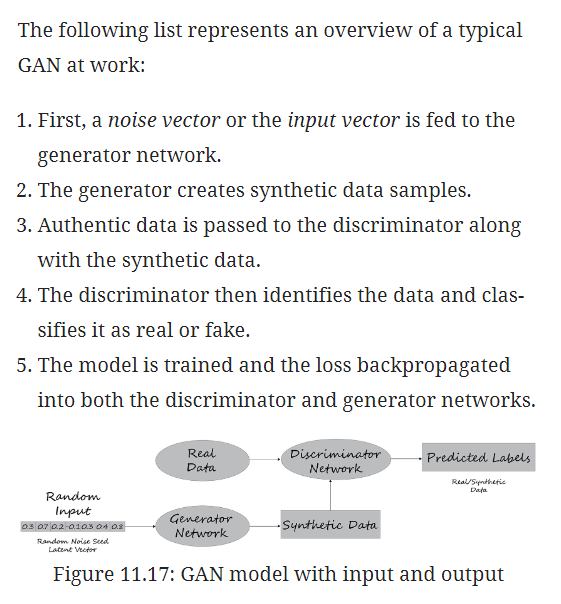 <br>

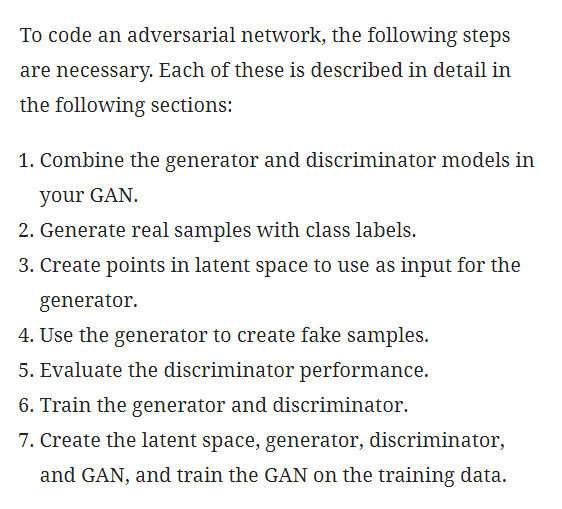 <br>

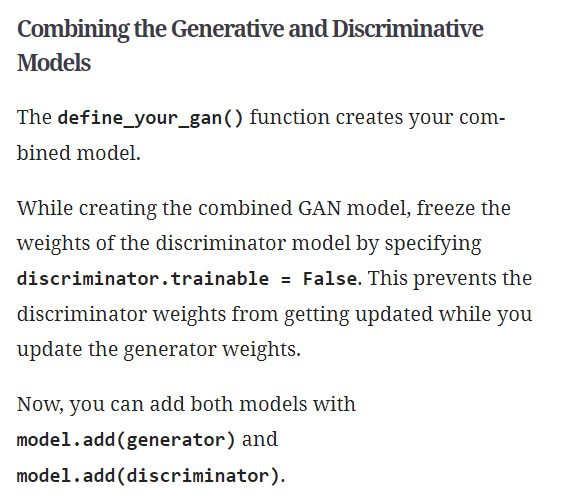

Create a function to define GANs by combining **the Generator** and **the Discriminator** model:

In [47]:
# function to form Generative Adversarial Networks(GANs)
def define_your_gan(generator, discriminator):

    # set the discriminator to be not trainable
    discriminator.trainable = False

    # create a model with a sequential structure
    model = Sequential()

    # add the generator model to the sequential model
    model.add(generator)

    # add the discriminator model to the sequential model
    model.add(discriminator)

    # compile the model with binary crossentropy loss function and adam optimizer
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam'
                  )

    # return the created model
    return model

-----

-----

### **Generating Sequences with GANs where you will use GAN to create a model to generate a Quadratic function(y = x^2) for the values of x b/w (-0.5, 0.5)**

*1. Import required libraries*

In [110]:
# import the Sequential class from the keras.models module
from tensorflow.keras.models import Sequential

# import the hstack, zeros and ones functions from the numpy module
from numpy import hstack, zeros, ones

# import the rand and randn functions from the numpy.random module
from numpy.random import rand, randn

# import the Dense class from the keras.layers module
from tensorflow.keras.layers import Dense

# import the pyplot module from matplotlib and give it an alias plt
import matplotlib.pyplot as plt

*2. Define the Generator Model as below:*

In [111]:
# function to define Generator model
def define_gen(latent_dim, n_outputs=2):

  # create a Sequential model
  model = Sequential()

  # add Dense layer with 15 units, relu activation, he_uniform kernel initializer
  # and input dimension equal to laten_dim
  model.add(Dense(15, activation="relu", kernel_initializer="he_uniform", input_dim=latent_dim))

  # add output Dense layer with n_outputs units and "linear" activation function
  model.add(Dense(n_outputs, activation="linear"))

  # return the model
  return model

*3. Define the Discriminator Model as below:*

In [112]:
# function to define discriminator model
def define_disc(n_inputs=2):

  # create a Sequential model
  model = Sequential()

  # add Dense layer with 25 units, relu activation, he_uniform kernel initializer and input dim
  model.add(Dense(25, activation="relu", kernel_initializer="he_uniform", input_dim=n_inputs))

  # add Dense output layer to classify where it's fake or real
  model.add(Dense(1, activation="sigmoid"))

  # compile the model with binary-crossentropy loss function, adam optimizer and accuracy metrics
  model.compile(
      optimizer = "adam",
      loss = "binary_crossentropy",
      metrics = ["accuracy"]
                )
  
  # return the model
  return model


*4. Form GANs model by combining the Generator and Discriminator models:*

In [113]:
# function to combine the Generator and Discriminator models
def define__gan(generator, discriminator):

  # set the discriminator to be not trainable
  discriminator.trainable = False

  # create a Sequential model
  model = Sequential()

  # add the Generator model to the Sequential model
  model.add(generator)

  # add the Discriminator model to the Sequential model
  model.add(discriminator)

  # compile the model with binary-crossentropy loss function & Adam optimizer
  model.compile(
      optimizer = "adam",
      loss = "binary_crossentropy"
                )
  
  # return the model
  return model

*5. Extract real samples from your dataset to inspect fake samples again them:*

In [114]:
# function to extract real samples
def generate_real(n):

    # generate n random numbers in the range [-0.5, 0.5]
    X1 = rand(n) - 0.5

    # square the random numbers to create a parabolic relationship
    X2 = X1 * X1

    # reshape the arrays to have shape (n, 1)
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)

    # stack the arrays horizontally to create a dataset with two features
    X = hstack((X1, X2))

    # create an array of ones to represent the class label for real samples
    y = ones((n, 1))
    
    # return the generated dataset and class labels
    return X, y

*Set the Generator model to create fake samples:*

In [115]:
# function to generate an array of random numbers with a normal distribution
def gen_latent_points(latent_dim, n):

  # generate 1D array of n * latent_dim values from a standard normal distribution
  x_input = randn(latent_dim * n)

  # reshape the 1D array into a 2D array with n rows and latent_dim columns
  x_input = x_input.reshape(n, latent_dim)

  return x_input

In [116]:
# Use the generator to generate fake samples with class labels
def gen_fake(generator, latent_dim, n):

    # generate latent points as input for the generator
    x_input = gen_latent_points(latent_dim, n)

    # use the generator to generate fake samples
    X = generator.predict(x_input)

    # create an array of zeros to represent the class label for fake samples
    y = zeros((n, 1))
    
    # return the generated dataset and class labels
    return X, y

*6. Evaluate the discriminator model by plotting both real and fake data points*

In [120]:
# function to plot real and fake data points
def performance_summary(epoch, generator, discriminator, latent_dim, n = 100):

  # generate n real samples with class labels
  x_real, y_real = generate_real(n)

  # evaluate the discriminator on the real samples
  _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)

  # generate n fake samples with class labels
  x_fake, y_fake = gen_fake(generator, latent_dim, n)

  # evaluate the discriminator on the fake samples
  _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)

  # display the epoch  number and the accuracy of the discriminator on real & fake samples
  print(epoch, acc_real, acc_fake)

  # create a scatter plot of the real and fake samples
  plt.scatter(x_real[:, 0], x_real[:, 1], color="black")
  plt.scatter(x_fake[:, 0], x_fake[:, 1], color="red")
  plt.show()

*7. Create a function to train the Model:*

In [121]:
# function to train the Model
def train(g_model, d_model, gan_model, latent_dim, n_epochs=1000, n_batches=128, n_eval=100):

  # calculate half of the batch size
  half_batch = int(n_batches / 2)

  # loop over the number of epochs
  for i in range(n_epochs):

    # generate half_batch real samples with class labels
    x_real, y_real = generate_real(half_batch)

    # generate half_batch fake samples with class labels
    x_fake, y_fake = gen_fake(g_model, latent_dim, half_batch)

    # update the discriminator model weights on real samples
    d_model.train_on_batch(x_real, y_real)

    # update the discriminator model weights on fake samples
    d_model.train_on_batch(x_fake, y_fake)

    # generate n_batch latent points
    x_gan = gen_latent_points(latent_dim, n_batches)

    # create a column vector of n_batch ones
    y_gan = ones((n_batches, 1))

    # update the generator via the discriminator's error
    gan_model.train_on_batch(x_gan, y_gan)

    # evaluate the model performance every n_eval epochs
    if (i + 1) % n_eval == 0:
      performance_summary(i, g_model, d_model, latent_dim)

Finally,

* Create a parameter for the latent dimension and set it equal to 5
* Then, create a generator, discriminator, and GAN using the respective functions 
* Train the generator, discriminator, and GAN models using the train function

4/4 [==============================] - 0s 2ms/step
99 0.28999999165534973 0.9399999976158142


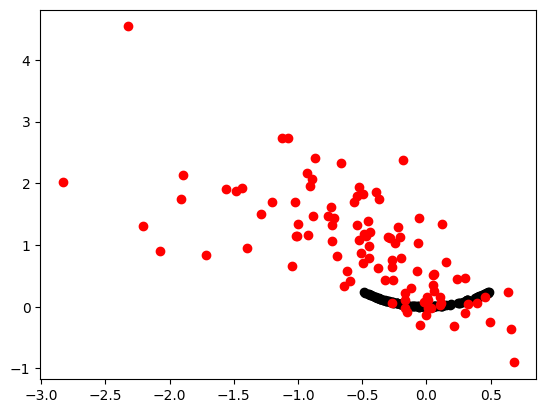

4/4 [==============================] - 0s 3ms/step
199 0.699999988079071 0.6800000071525574


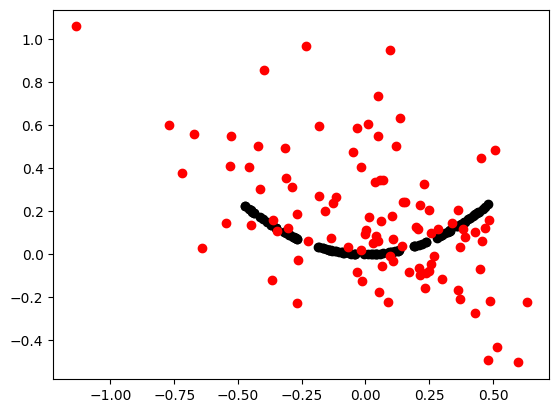

4/4 [==============================] - 0s 3ms/step
299 0.6700000166893005 0.550000011920929


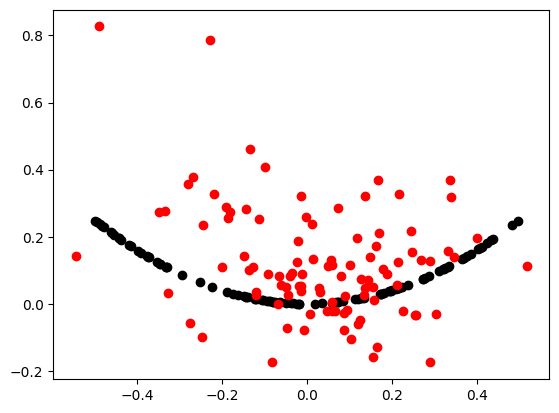

4/4 [==============================] - 0s 2ms/step
399 0.8199999928474426 0.49000000953674316


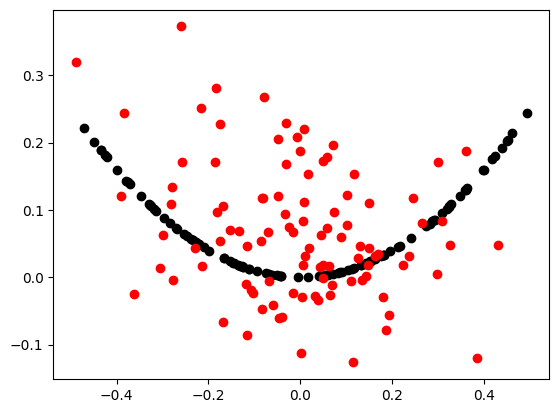

4/4 [==============================] - 0s 3ms/step
499 0.9300000071525574 0.3100000023841858


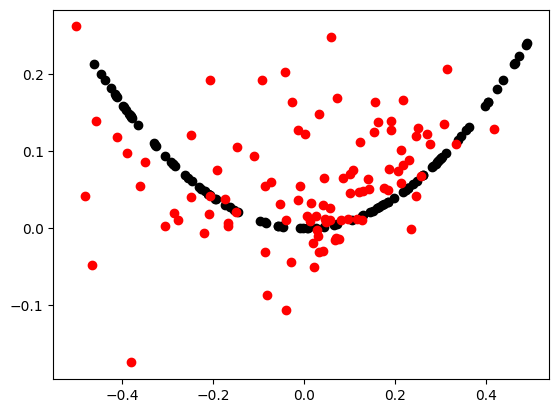

4/4 [==============================] - 0s 4ms/step
599 0.9399999976158142 0.25


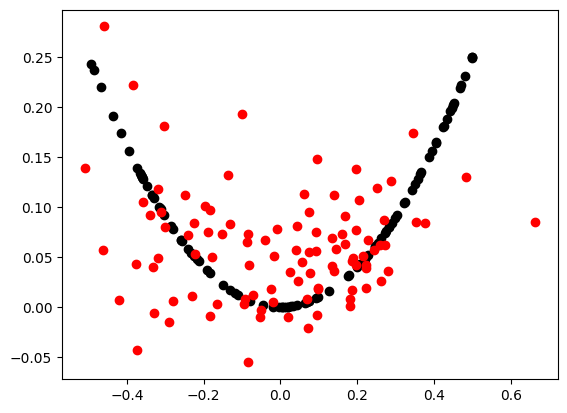

4/4 [==============================] - 0s 2ms/step
699 1.0 0.2800000011920929


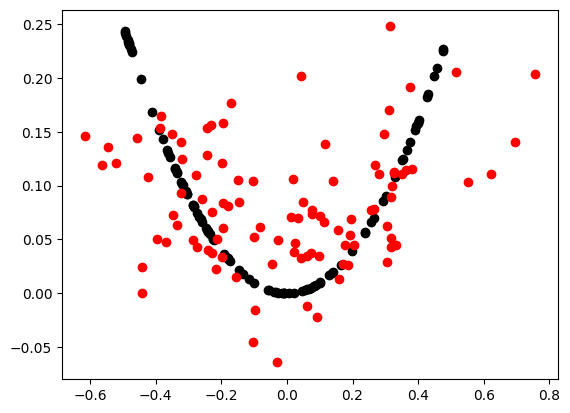

4/4 [==============================] - 0s 3ms/step
799 1.0 0.30000001192092896


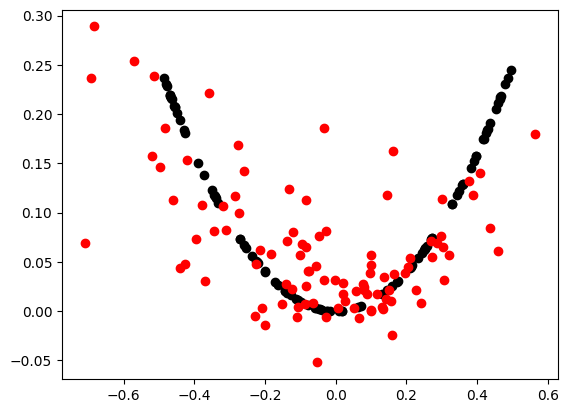

4/4 [==============================] - 0s 3ms/step
899 1.0 0.23999999463558197


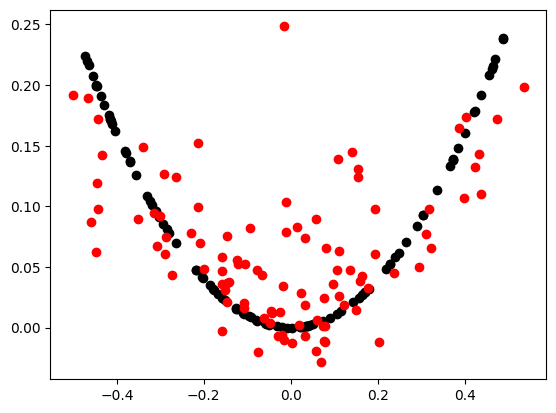

4/4 [==============================] - 0s 3ms/step
999 1.0 0.47999998927116394


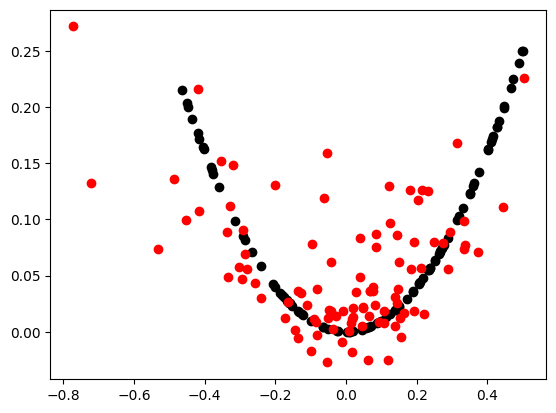

In [122]:
# set the size of the latent space
latent_dim = 5

# define the generator model
generator = define_gen(latent_dim)

# define the discriminator model
discriminator = define_disc()

# define the GAN model by combining the generator and discriminator models
gan_model = define_gan(generator, discriminator)

# train the GAN model
train(generator, discriminator, gan_model, latent_dim)

* The output shows the generator progressively improving by generating points that more closely resemble a quadratic function. 

* In early epochs, the points generated by the generator, indicated by the black dots, show little similarity to the true quadratic function, indicated by the red dots. 

* However, by the final epoch, the points generated by the generator almost lie on top of the true points, demonstrating that the generator has almost captured the true underlying function – the quadratic.

-------

-------

# <center>**Deep Convolutional Generative Adversarial Networks(DCGANs)**</center>

-->**DCGANs = Generator + Discriminator** uses **Convolutional neural networks** to generate higher-quality images